In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt  
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense,Flatten,Activation,Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical

In [7]:
Dirctr=r'C:\Users\saurabh\Documents\Desktop\Google_Quickdraw\Data'
Draw_Data=([[0 for i in range(784)]])
label=[]
classes=[]
index=0
for file in os.listdir(Dirctr):
    Draw_Data.extend(np.load(os.path.join(Dirctr,file)))
    label.extend([[index] for i in range(len(np.load(os.path.join(Dirctr,file))))])
    index+=1
    classes.append(file[18:-4])##remove earlier lines
Draw_Data=Draw_Data[1:]

for i in range(len(Draw_Data)):
    Draw_Data[i]=np.append(Draw_Data[i],label[i])
    
len(Draw_Data)


500926

In [8]:
classes

['alarm clock', 'ant', 'bat', 'The Eiffel Tower']

In [11]:
random.shuffle(Draw_Data)#only works for list properly

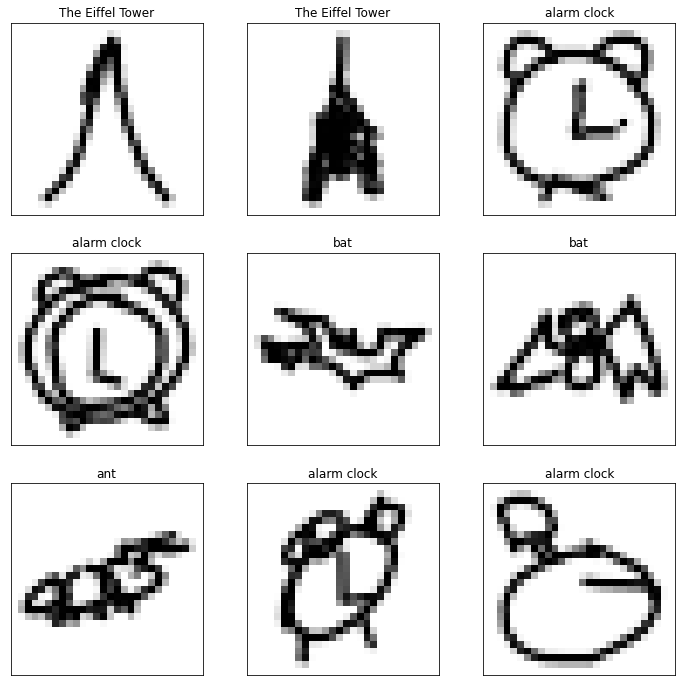

In [12]:
fig,ax=plt.subplots(3,3,figsize=(12,12))
count=10
for axes in ax:
    for axis in axes:

        axis.imshow(Draw_Data[count][:-1].reshape(28,28),cmap='Greys')
        axis.set_title(classes[Draw_Data[count][-1]])
        axis.set_xticks([])
        axis.set_yticks([])
        count+=1

In [19]:
X=[]
y=[]
for i in range(len(Draw_Data)):
    X.append(Draw_Data[i][:-1])
    y.append(Draw_Data[i][-1])

In [20]:
Y=to_categorical(y, index)

In [21]:
X=np.array(X)
y=np.array(y)

In [22]:
X=X/255.0

In [17]:
X=X.reshape(-1,28,28,1)

In [50]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))

model.add(Dropout(0.1))


model.add(Conv2D(32,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))

model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(index))##layer must be same no as outputs
model.add(Activation('softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X,Y,batch_size=300,validation_split=0.1)



1503/1503 [==============================] - 361s 240ms/step - loss: 0.1912 - accuracy: 0.9336 - val_loss: 0.1136 - val_accuracy: 0.9614


In [51]:
model.save('Quickdraw1.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Quickdraw1.model\assets


In [41]:
len(y[np.where(y==3)])

134801